<a href="https://colab.research.google.com/github/yanhoyos/Clasificacion-Senales/blob/main/PatternRecognitionOnEmotional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

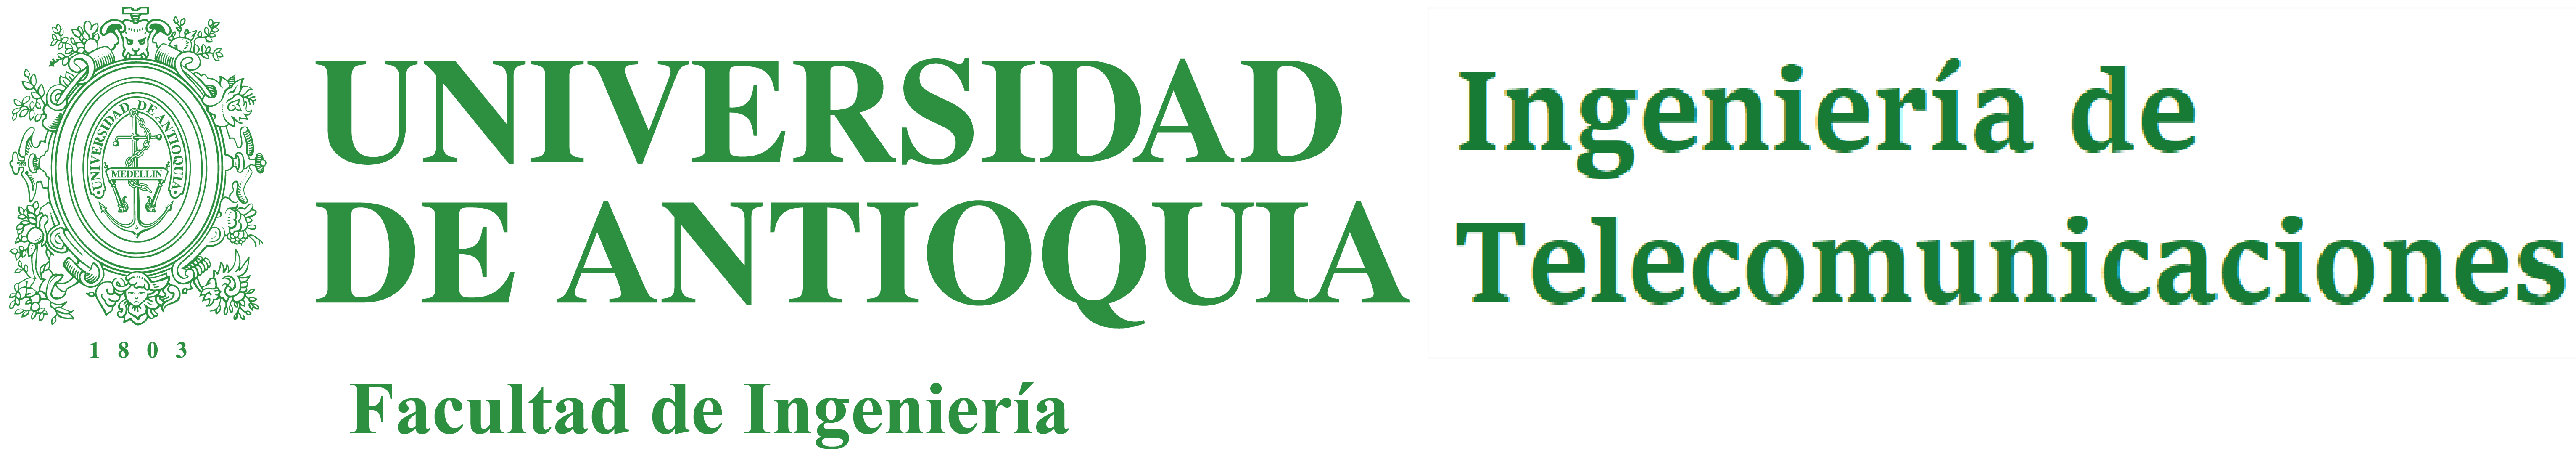

# Universidad de Antiquia
# Procesamiento de Señales para Machine Learning
## Facultad de Ingeniería
### Agosto 2022

## Laboratorio de PCA + Clasificación con modelo Naive Bayes Gaussiano y Regresión Logística

### Integrantes:
- Camilo Hernández Ruiz
- Yan Sebastián Hoyos

# 1. Creación de sets de entrenamiento y prueba
Primero se importa el dataset desde _sklearn_ y se separa en sets de entrenamiento y prueba.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/TS3 provisional/Laboratorio 5: reconocimiento de patrones en datasets emocionales'
print('Mostrando elementos de la carpeta:')
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TS3 provisional/Laboratorio 5: reconocimiento de patrones en datasets emocionales
Mostrando elementos de la carpeta:
 affectiveDB_2.mat  'Características biométricas.npy'
 affectiveDB_3.mat  'Etiquetas Tipo de Movimiento.npy'
 affetiveDB_1.mat    PatternRecognitionOnEmotional.ipynb


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from ipywidgets import interact
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

X = np.load('Características biométricas.npy')
labels = np.load('Etiquetas Tipo de Movimiento.npy')
# Escalamiento
X_scaled = StandardScaler().fit_transform(X)

In [3]:
display(labels)
y = labels.copy()
y[np.where(labels=='Negativo')] = 0
y[np.where(labels=='Neutral')] = 1
y[np.where(labels=='Positivo')] = 2
y = np.asarray(y, dtype=np.uint8)
display(y)

nombres = ('Negativo','Neutral','Positivo')

array(['Negativo', 'Positivo', 'Positivo', 'Positivo', 'Neutral',
       'Neutral', 'Positivo', 'Neutral', 'Neutral', 'Neutral', 'Positivo',
       'Neutral', 'Neutral', 'Neutral', 'Negativo', 'Neutral', 'Negativo',
       'Positivo', 'Negativo', 'Neutral', 'Neutral', 'Positivo',
       'Neutral', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Neutral', 'Positivo', 'Neutral', 'Neutral',
       'Negativo', 'Negativo', 'Negativo', 'Neutral', 'Positivo',
       'Neutral', 'Positivo', 'Neutral'], dtype='<U8')

array([0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1], dtype=uint8)

In [4]:
#scaler = StandardScaler().fit(X)
#print(scaler.var_)
#print(scaler.mean_)

# 2. Regresión Logística de los datos de entrada escalados.

Resultados del Modelo de Regresión Logística en el espacio de entrada
Accuracy in Training:  100.0% +/- 0.0%
Accuracy in Testing:  45.0% +/- 24.49%


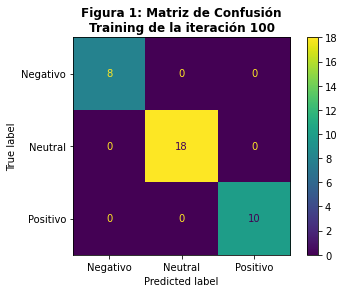

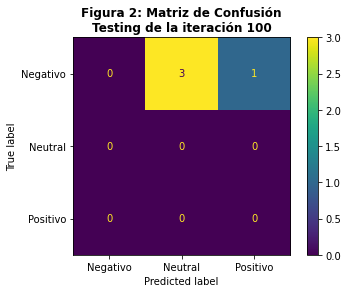

In [5]:
acc_train, acc_test = [], []
Nreps = 100
for it in range(Nreps):
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=.9)

  LRmodel = LogisticRegression(C = 0.05) # C: inverso de regularización
  LRmodel.fit(X_train, y_train)

  y_est_train = LRmodel.predict(X_train)
  y_est_test = LRmodel.predict(X_test)

  acc_train.append(accuracy_score(y_train, y_est_train))
  acc_test.append(accuracy_score(y_test, y_est_test))
else:
  print('Resultados del Modelo de Regresión Logística en el espacio de entrada')
  print(f'Accuracy in Training:  {round(np.mean(acc_train)*100,2)}% +/- {round(np.std(acc_train)*100,2)}%')
  print(f'Accuracy in Testing:  {round(np.mean(acc_test)*100,2)}% +/- {round(np.std(acc_test)*100,2)}%')
  
  cMat_train = confusion_matrix(y_train,y_est_train)

  ax = ConfusionMatrixDisplay(cMat_train,display_labels=nombres)
  ax.plot()
  plt.title(f'Figura 1: Matriz de Confusión\nTraining de la iteración {Nreps}', fontweight='bold')
  plt.show()

  cMat_test = confusion_matrix(y_test,y_est_test)

  ax = ConfusionMatrixDisplay(cMat_test,display_labels=nombres)
  ax.plot()
  plt.title(f'Figura 2: Matriz de Confusión\nTesting de la iteración {Nreps}', fontweight='bold')
  plt.show()


# 3. Clasificación bayesiana con los datos de entrada escalados.

Resultados del Modelo de Regresión Logística en el espacio de entrada
Accuracy in Training:  81.44% +/- 3.98%
Accuracy in Testing:  45.25% +/- 23.37%


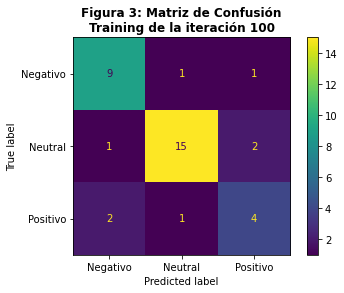

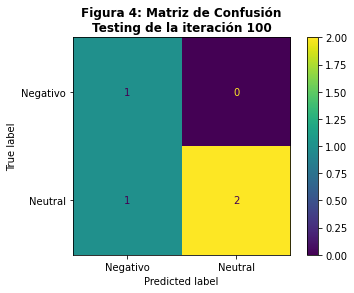

In [6]:
acc_train, acc_test = [], []
Nreps = 100
for it in range(Nreps):
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=.9)

  GNBmodel = GaussianNB() # C: inverso de regularización
  GNBmodel.fit(X_train, y_train)

  y_est_train = GNBmodel.predict(X_train)
  y_est_test = GNBmodel.predict(X_test)

  acc_train.append(accuracy_score(y_train, y_est_train))
  acc_test.append(accuracy_score(y_test, y_est_test))
else:
  print('Resultados del Modelo de Regresión Logística en el espacio de entrada')
  print(f'Accuracy in Training:  {round(np.mean(acc_train)*100,2)}% +/- {round(np.std(acc_train)*100,2)}%')
  print(f'Accuracy in Testing:  {round(np.mean(acc_test)*100,2)}% +/- {round(np.std(acc_test)*100,2)}%')
  
  cMat_train = confusion_matrix(y_train,y_est_train)

  ax = ConfusionMatrixDisplay(cMat_train,display_labels=nombres)
  ax.plot()
  plt.title(f'Figura 3: Matriz de Confusión\nTraining de la iteración {Nreps}', fontweight='bold')
  plt.show()

  cMat_test = confusion_matrix(y_test,y_est_test)

  ax = ConfusionMatrixDisplay(cMat_test,display_labels=nombres)
  ax.plot()
  plt.title(f'Figura 4: Matriz de Confusión\nTesting de la iteración {Nreps}', fontweight='bold')
  plt.show()


# 4. Análisis PCA
Para entender mejor la importancia de las características, se ha realizado una transformación PCA.

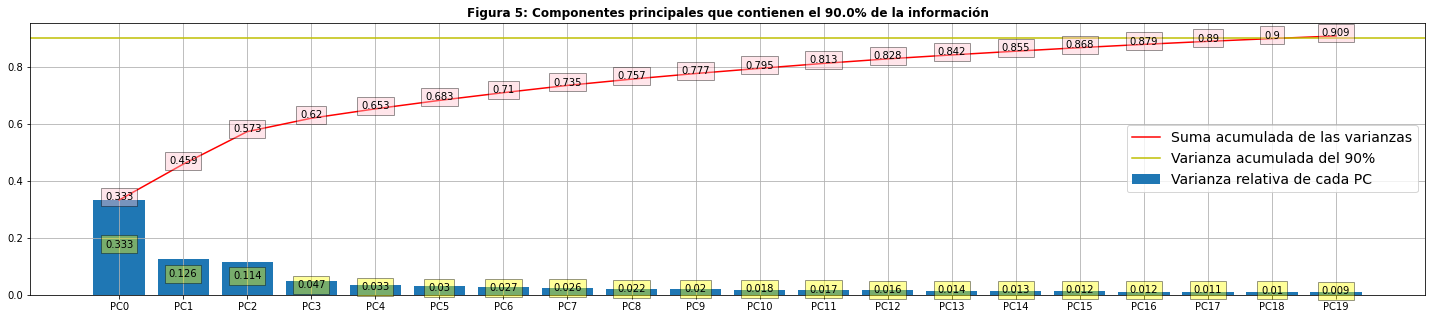

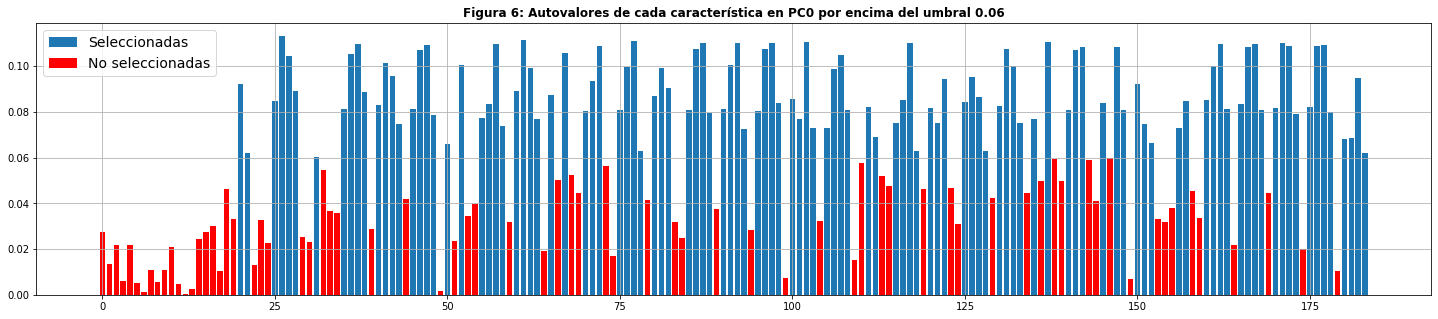

In [7]:
from sklearn.decomposition import PCA

def addtext(x,y,razon,box_color):
    for i in range(len(x)):
        plt.text(i,y[i]/razon,y[i],ha='center',
                  bbox = dict(facecolor=box_color, alpha=0.4))

pca = PCA().fit(X_scaled)
X_pca = pca.transform(X_scaled)
ncomp = 20
X_pca_ncomp = X_pca[:,:ncomp]
columnsPCAs = [f'PC{i}' for i in range(X_pca_ncomp.shape[1])]
fig_size=(25,5)
umbral_varianza = 0.9
# Gráfica de la varianza relativa de los PC
plt.figure(figsize=fig_size)
plt.plot(np.cumsum(pca.explained_variance_ratio_[:ncomp]),'r',label='Suma acumulada de las varianzas')
plt.bar(columnsPCAs, abs(pca.explained_variance_ratio_[:ncomp]),label='Varianza relativa de cada PC')
plt.axhline(umbral_varianza,c='y',label='Varianza acumulada del 90%')
addtext(columnsPCAs, abs(pca.explained_variance_ratio_[:ncomp].round(3)) , 2, 'yellow')
addtext(columnsPCAs, abs(np.cumsum(pca.explained_variance_ratio_[:ncomp]).round(3)) , 1, 'pink')
plt.legend(loc='center right', fontsize=14)
plt.title(f'Figura 5: Componentes principales que contienen el {umbral_varianza*100}% de la información', fontweight="bold")
plt.grid(True)
plt.show()

# Gráfica de los coeficientes de importancia de cada feature en PC0
umbral_caracteristicas = 0.06
selected_features = abs(pca.components_[0][np.where(pca.components_[0]>umbral_caracteristicas)])
not_selected_features = abs(pca.components_[0][np.where(pca.components_[0]<=umbral_caracteristicas)])
index_sel_features = np.where(pca.components_[0]>umbral_caracteristicas)[0]
index_not_sel_features = np.where(pca.components_[0]<=umbral_caracteristicas)[0]
plt.figure(figsize=fig_size)
plt.bar(index_sel_features,selected_features,label='Seleccionadas')
plt.bar(index_not_sel_features,not_selected_features,color='r', label='No seleccionadas')
plt.legend(fontsize=14)
#addtext(range(X.shape[1]),abs(pca.components_[0]).round(3), 2, 'yellow')
plt.title(f'Figura 6: Autovalores de cada característica en PC0 por encima del umbral {umbral_caracteristicas}',fontweight="bold")
plt.grid(True)
plt.show()

# 5. Visualización de las componentes en 2D

In [8]:
@interact(h_comp=(0,pca.n_components_-1),v_comp=(0,pca.n_components_-1))
def plot_components_2D(h_comp=0,v_comp=1):
  plt.figure(figsize=(15,6))
  dict_color = {0:'r', 1:'black', 2:'blue'}
  for i,clase in enumerate(y):
    plt.scatter(pca.components_[h_comp][i],pca.components_[v_comp][i], color=dict_color[clase])
  plt.title(f'Figura 7: Muestras en las componentes {h_comp} y {v_comp}', fontweight='bold',fontsize=14)
  plt.xlabel(f'PC{h_comp}', fontsize=14)
  plt.ylabel(f'PC{v_comp}', fontsize=14)
  plt.grid()
  plt.show()

interactive(children=(IntSlider(value=0, description='h_comp', max=39), IntSlider(value=1, description='v_comp…

# 6. Regresión logistica en el espacio latente con n componentes.

In [9]:
@interact(ncomp=(1,40))
def RegLogPCA(ncomp=20):
  pca = PCA(n_components=ncomp).fit(X_scaled)
  X_pca = pca.transform(X_scaled)
  acc_train, acc_test = [], []
  Nreps = 100

  for it in range(Nreps):
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:ncomp], y, train_size=.75)

    LRmodel = LogisticRegression(C = 0.05) # C: inverso de regularización
    LRmodel.fit(X_train, y_train)

    y_est_train = LRmodel.predict(X_train)
    y_est_test = LRmodel.predict(X_test)

    acc_train.append(accuracy_score(y_train, y_est_train))
    acc_test.append(accuracy_score(y_test, y_est_test))
  else:
    print('Resultados del Modelo de Regresión Logística en el ')
    print(f'Accuracy in Training:  {round(np.mean(acc_train)*100,2)}% +/- {round(np.std(acc_train)*100,2)}%')
    print(f'Accuracy in Testing:  {round(np.mean(acc_test)*100,2)}% +/- {round(np.std(acc_test)*100,2)}%')
    
    cMat_train = confusion_matrix(y_train,y_est_train)

    ax = ConfusionMatrixDisplay(cMat_train,display_labels=nombres)
    ax.plot()
    plt.title(f'Figura 8: Matriz de Confusión\nTraining de la iteración {Nreps}', fontweight='bold')
    plt.show()

    cMat_test = confusion_matrix(y_test,y_est_test)

    ax = ConfusionMatrixDisplay(cMat_test,display_labels=nombres)
    ax.plot()
    plt.title(f'Figura 9: Matriz de Confusión\nTesting de la iteración {Nreps}', fontweight='bold')
    plt.show()



interactive(children=(IntSlider(value=20, description='ncomp', max=40, min=1), Output()), _dom_classes=('widge…

# 7. Clasificación con el modelo bayesiano en el espacio latente con n componentes.

In [10]:
@interact(ncomp=(1,40))
def RegLogPCA(ncomp=20):
  pca = PCA(n_components=ncomp).fit(X_scaled)
  X_pca = pca.transform(X_scaled)
  acc_train, acc_test = [], []
  Nreps = 100

  for it in range(Nreps):
    X_train, X_test, y_train, y_test = train_test_split(X_pca[:,:ncomp], y, train_size=.75)

    GNBmodel = GaussianNB() # C: inverso de regularización
    GNBmodel.fit(X_train, y_train)

    y_est_train = GNBmodel.predict(X_train)
    y_est_test = GNBmodel.predict(X_test)

    acc_train.append(accuracy_score(y_train, y_est_train))
    acc_test.append(accuracy_score(y_test, y_est_test))
  else:
    print('Resultados del Modelo Gaussiano de Naive Bayes')
    print(f'Accuracy in Training:  {round(np.mean(acc_train)*100,2)}% +/- {round(np.std(acc_train)*100,2)}%')
    print(f'Accuracy in Testing:  {round(np.mean(acc_test)*100,2)}% +/- {round(np.std(acc_test)*100,2)}%')
    cMat_train = confusion_matrix(y_train,y_est_train)

    ax = ConfusionMatrixDisplay(cMat_train,display_labels=nombres)
    ax.plot()
    plt.title(f'Figura 10: Matriz de Confusión\nTraining de la iteración {Nreps}', fontweight='bold')
    plt.show()

    cMat_test = confusion_matrix(y_test,y_est_test)

    ax = ConfusionMatrixDisplay(cMat_test,display_labels=nombres)
    ax.plot()
    plt.title(f'Figura 11: Matriz de Confusión\nTesting de la iteración {Nreps}', fontweight='bold')
    plt.show()


interactive(children=(IntSlider(value=20, description='ncomp', max=40, min=1), Output()), _dom_classes=('widge…

# 8. Discusión y conclusiones
- De la figura 5 se ve que las 20 primeras componentes principales contienen al menos el 90% de la varianza de los datos, donde PC0 contiene el 33.3%.

- La figura 6 muestra los autovalores de las características en PC0. En color azul muestra las características que sobrepasan el umbral de 0.06, que se han asignado como las más importantes.

- Entre más se aumentan el número de componentes en la Regresión Logística, más se acerca al 100% de accuracy score en el training data. Sin embargo, el accuracy score en la fase de testing no mejora más allá del 40%. Asumimos este comportamiento a la dificultad que existe de realizar modelos predictivos sobre datos biomédicos.

- Las figuras 1-4 y 8-11 sólo muestran las matrices de confusión de la última iteración de la regresión logística y del clasificador bayesiano. Al ejecutarse varias veces, se observa que en la mayoría de ejecuciones muestra el pésimo accuracy score de la fase de testing.

- La figura 7 muestra el scatter plot de las muestras en el par de componentes que se elijan. Naturalmente, las componentes 0 y 1 graficarán los puntos con mayor varianza entre ellos. Al variar las componentes, se nota que las emociones negativas están más reunidas casi sin importar la proyección elegida.